# <b>House price analysis</b>
Lets start by analysing the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
train_data = pd.read_csv('../data/train.csv', delimiter=',').drop(['Id'], axis=1)
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [3]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.select_dtypes(include='number').head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
train_data.select_dtypes(exclude='number').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [155]:
train_data.describe(exclude=[np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Lets look at the distribution of the <i>sales price</i>.

/Users/jessica/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


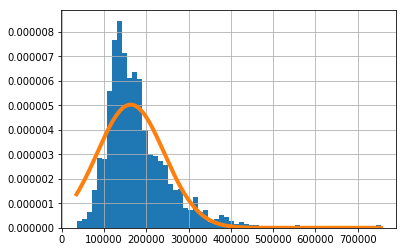

In [7]:
train_sales_price_sorted = train_data['SalePrice'].sort_values()
train_sales_price_sorted.hist(bins=60, normed=True)
sales_price_normal_dist = stats.norm.pdf(train_sales_price_sorted, np.median(train_sales_price_sorted),
               np.std(train_sales_price_sorted))
plt.plot(train_sales_price_sorted, sales_price_normal_dist, linewidth=4)
plt.rcParams['figure.figsize'] = [16,8]
plt.show()

Display correlation between columns in the data.

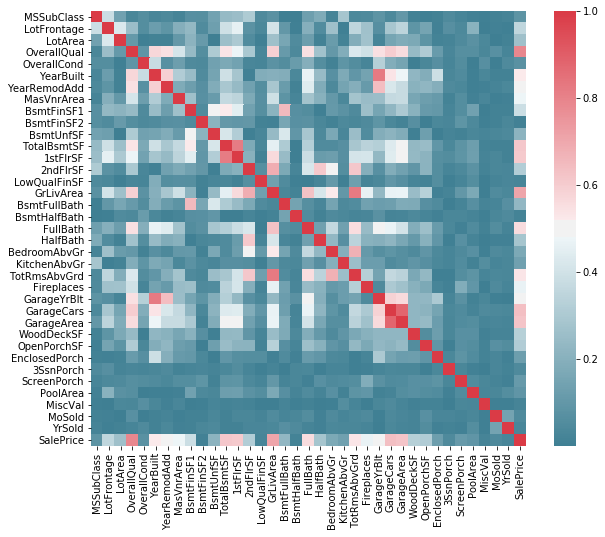

In [8]:
data_corr = train_data.corr().abs()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

/Users/jessica/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2790: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


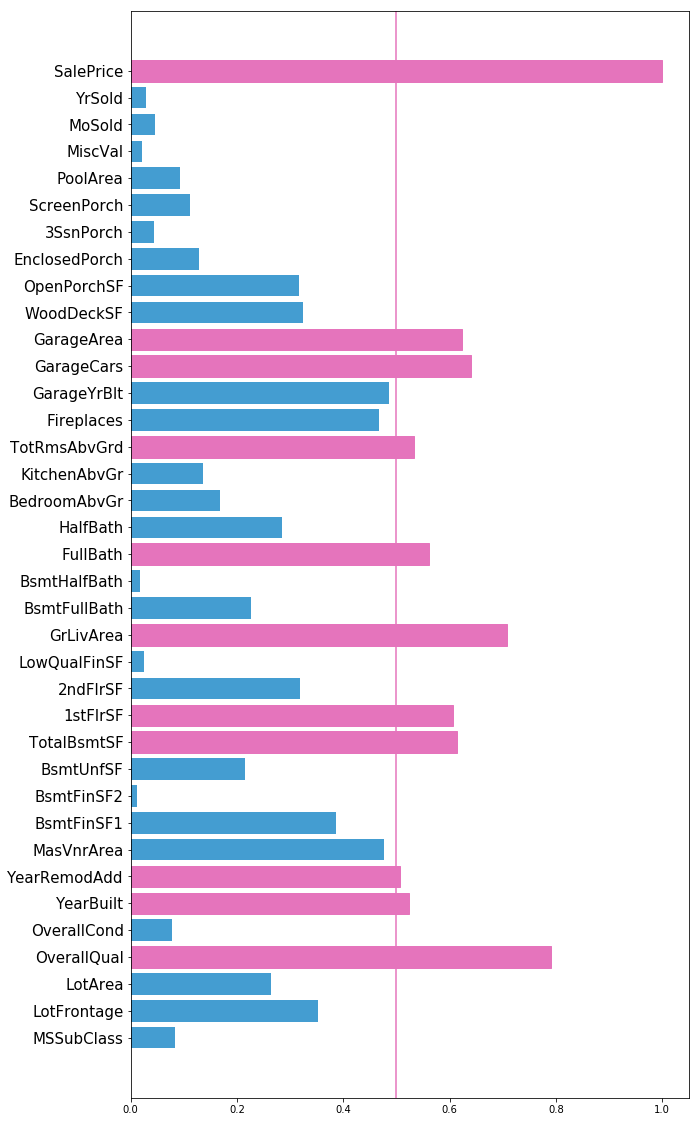

In [193]:
sale_price = data_corr['SalePrice'].values
row_names = pd.Series([row_name for row_name in data_corr['SalePrice'].index])

barlist=plt.barh(bottom=np.arange(len(sale_price)),
       width=sale_price,
       tick_label=row_names, color='#449DD1')

corr_high = np.arange(len(sale_price))[sale_price >= 0.5]
for i in corr_high:
    barlist[i].set_color('#E574BC')

plt.yticks( size=15)
#plt.tick_params(colors='b')
plt.axvline(x=0.5, ymin=0, ymax=1, hold=None, color='#E574BC')
plt.rcParams['figure.figsize'] = [10,20]

plt.show()

# Columns correlating to Sale Price are:

In [171]:
important_columns = [col for col in data_corr.loc[:, data_corr['SalePrice'] >= 0.3].columns]
train_data.loc[:, important_columns].head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


# Continue with columns that has corr >= 0.3 to SalePrice.

In [191]:
important_columns_data = train_data.loc[:, important_columns].fillna(0)

In [173]:
linear_corr_important_col = important_columns_data.corr().abs()

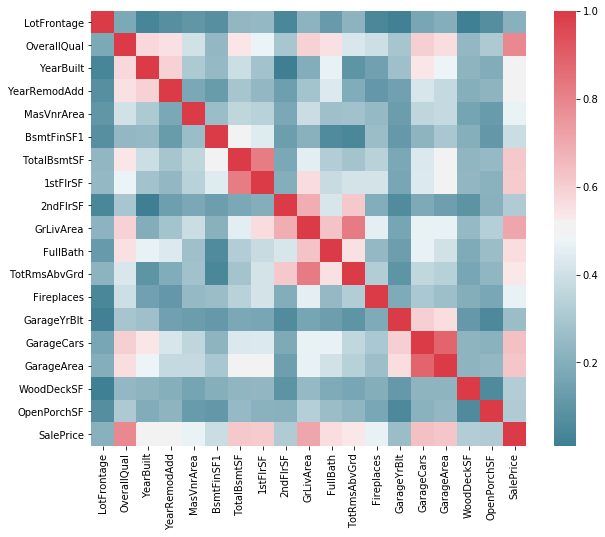

In [174]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(linear_corr_important_col, mask=np.zeros_like(linear_corr_important_col, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

## Try training Ridge Regression, Lasso, Elastic Net adn Nearest Neighbour on this part of the dataset

In [175]:
split_on_row = int(0.8*important_columns_data.shape[0])
important_columns_data_train = important_columns_data.iloc[:split_on_row, :]
important_columns_data_test = important_columns_data.iloc[split_on_row:, :]

X_train = important_columns_data_train.drop(axis=1, columns=['SalePrice'])
y_train = important_columns_data_train['SalePrice']
X_validation = important_columns_data_test.drop(axis=1, columns=['SalePrice'])
y_validation =important_columns_data_test['SalePrice']

print(important_columns_data_train.shape)
print(important_columns_data_test.shape)

(1168, 19)
(292, 19)


In [176]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

### Ridge Regression

In [177]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_validation)
ridge_regression_r2 = r2_score(y_validation, ridge_prediction)

### Lasso

In [181]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_validation)
lasso_r2 = r2_score(y_validation, lasso_prediction)

/Users/jessica/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Elastic Net

In [182]:
elastic_net_model = ElasticNet(alpha=0.001)
elastic_net_model.fit(X_train, y_train)
elastic_net_prediction = elastic_net_model.predict(X_validation)
elastic_net_r2 = r2_score(y_validation, elastic_net_prediction)

/Users/jessica/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### LARS Lasso

In [183]:
lars_lasso_model = LassoLars(alpha=0.1)
lars_lasso_model.fit(X_train, y_train)
lars_lasso_prediction = lars_lasso_model.predict(X_validation)
lars_lasso_r2 = r2_score(y_validation, lars_lasso_prediction)

### Nearest Neighbour Regression

In [184]:
def run_knn(n_neighbors, X_train, y_train, X_validation, y_validation):
    score_on_train = {}
    score_on_validation = {}

    for i, weights in enumerate(['uniform', 'distance']):
        nn_model = KNeighborsRegressor(n_neighbors, weights = weights, p=1)
        nn_model.fit(X_train, y_train)
        train_prediction = nn_model.predict(X_train)
        score_on_train[weights] = r2_score(y_train, train_prediction)

        nn_prediction = nn_model.predict(X_validation)
        score_on_validation[weights] = r2_score(y_validation, nn_prediction)
    return score_on_validation, nn_prediction

Try different number of neighbours

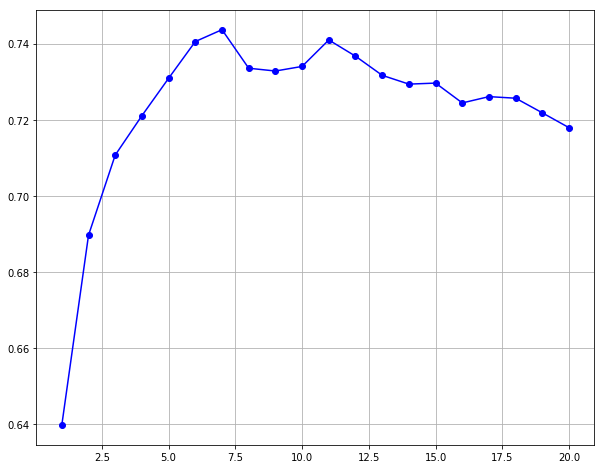

In [185]:
knn_r2 = pd.DataFrame(columns = ['no_of_neighbours', 'r2'])
for n_neighbors in range(1,21):
    score, prediction = run_knn(n_neighbors, X_train, y_train, X_validation, y_validation)
    result = pd.DataFrame([[n_neighbors, score['distance']]],
                    columns = ['no_of_neighbours', 'r2'])
    knn_r2 = knn_r2.append(result)

f, ax = plt.subplots(figsize=(10, 8))
ax.plot(knn_r2['no_of_neighbours'], knn_r2['r2'], '-bo')
ax.grid(True)

7 neighbors gives the best r2

In [186]:
n_neighbors = 7
nn_regression_r2, nn_regression_prediction = run_knn(n_neighbors, X_train, y_train, X_validation, y_validation)

## Result

In [187]:
print('Ridge Regression r2 score on validation is: ', ridge_regression_r2)
print('Lasso r2 score on validation is: ', lasso_r2)
print('Elastic Net r2 score on validation is: ', elastic_net_r2)
print('LARS Lasso r2 score on validation is: ', lars_lasso_r2)
print('Uniform Nearest Neighbour Regression r2 score on validation is: ', nn_regression_r2['uniform'])
print('Distance Nearest Neighbour Regression r2 score on validation is: ', nn_regression_r2['distance'])

Ridge Regression r2 score on validation is:  0.6296323062313902
Lasso r2 score on validation is:  0.6296399557214827
Elastic Net r2 score on validation is:  0.6295854990968555
LARS Lasso r2 score on validation is:  0.6296881022033325
Uniform Nearest Neighbour Regression r2 score on validation is:  0.7315426862882519
Distance Nearest Neighbour Regression r2 score on validation is:  0.7436404401000151


In [188]:
predictions = {'Ridge Regression': ridge_prediction, 
               'Lasso': lasso_prediction, 
               'Elastic Net': elastic_net_prediction,
               'LARS Lasso': lars_lasso_prediction,
               'NN Regression Uniform': nn_regression_prediction,
               'NN Regression Distance': nn_regression_prediction}

In [189]:
from sklearn.metrics import mean_squared_log_error
import numpy as np
for key, value in predictions.items():
    print(np.sqrt(mean_squared_log_error(y_validation, value, sample_weight=None, multioutput='uniform_average')))

0.22161239636735725
0.22161667718912223
0.221588461822855
0.2215675195094293
0.1905259756948892
0.1905259756948892


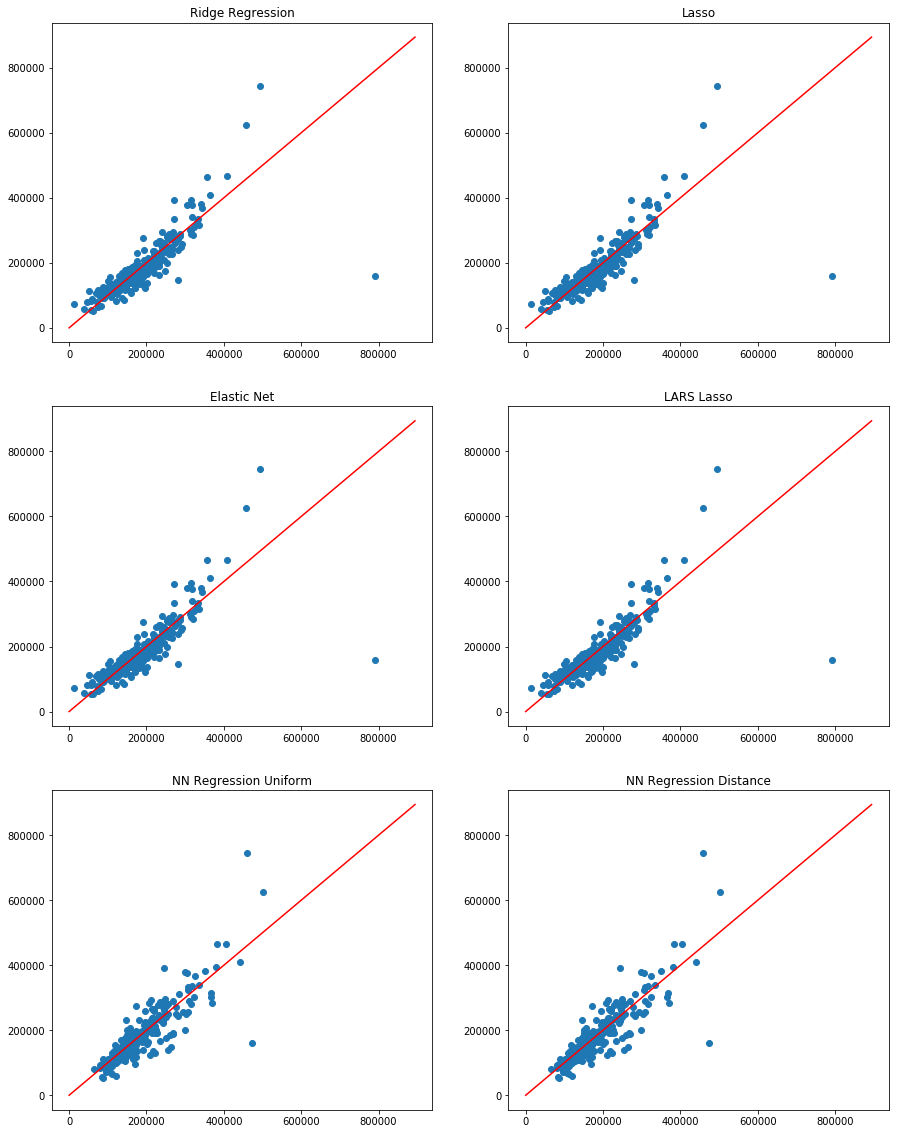

In [190]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axes = axes.ravel()
comparison = [0,max(y_validation)*1.2]

for i, axis in enumerate(axes): #range(1,3):#, len(predictions)+1):
    axis.scatter(predictions.get(list(predictions.keys())[i]), y_validation)
    axis.plot(comparison, comparison, 'r')
    axis.set_title(list(predictions.keys())[i])

## Try doing knn on whole dataset

In [162]:
#number_columns_data_train = train_data.iloc[:split_on_row, :].select_dtypes('number').fillna(0)
#number_columns_data_test = train_data.iloc[split_on_row:, :].select_dtypes('number').fillna(0)